# Anomaly Detection using Isolation Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# generate two features
x1 = np.random.randint(40,50,30)
x2 = np.random.randint(120,160,30)

In [8]:
sns.set_theme()

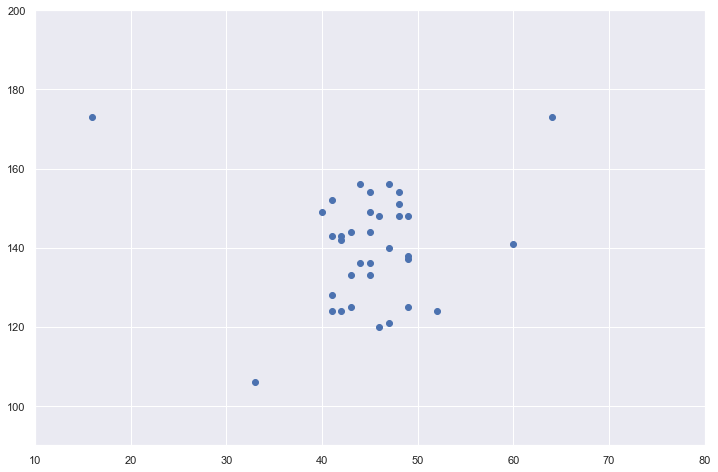

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(x1,x2)
plt.xlim([10,80])
plt.ylim([90,200])
plt.show()

In [10]:
x1 = np.concatenate([x1,np.random.randint(10,100,10)])
x2 = np.concatenate([x2,np.random.randint(40,250,10)])
x1.shape,x2.shape

((40,), (40,))

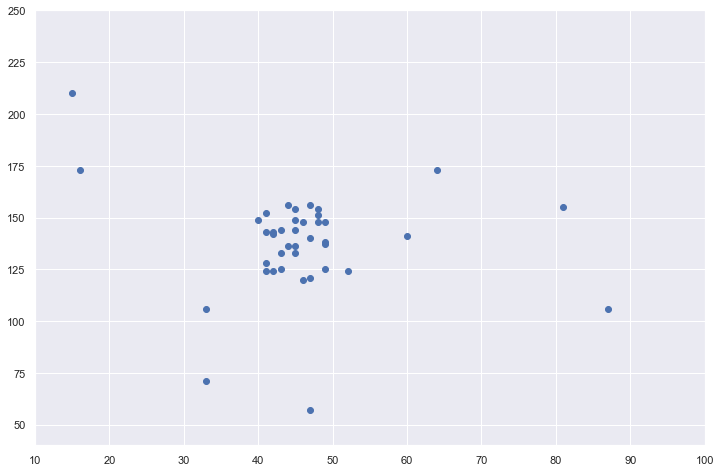

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(x1,x2)
plt.xlim([10,100])
plt.ylim([40,250])
plt.show()

In [14]:
data = np.concatenate([[x1],[x2]]).T
data.shape

(40, 2)

## Apply Isolation Forest

In [22]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=100,contamination=0.2,random_state=5,n_jobs=-1)
model.fit(data)

IsolationForest(contamination=0.2, n_jobs=-1, random_state=5)

In [23]:
pred = model.predict(data)

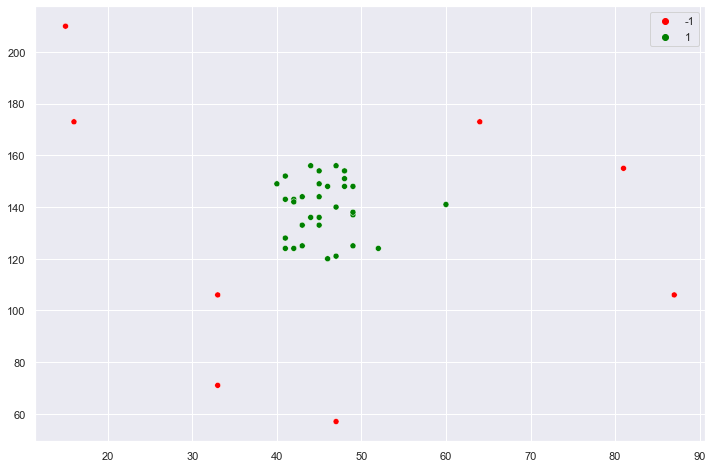

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=x1,y=x2,hue=pred,palette=['red','green'])
plt.show()

In [25]:
model[0]

ExtraTreeRegressor(max_depth=6, max_features=1, random_state=1228472244)

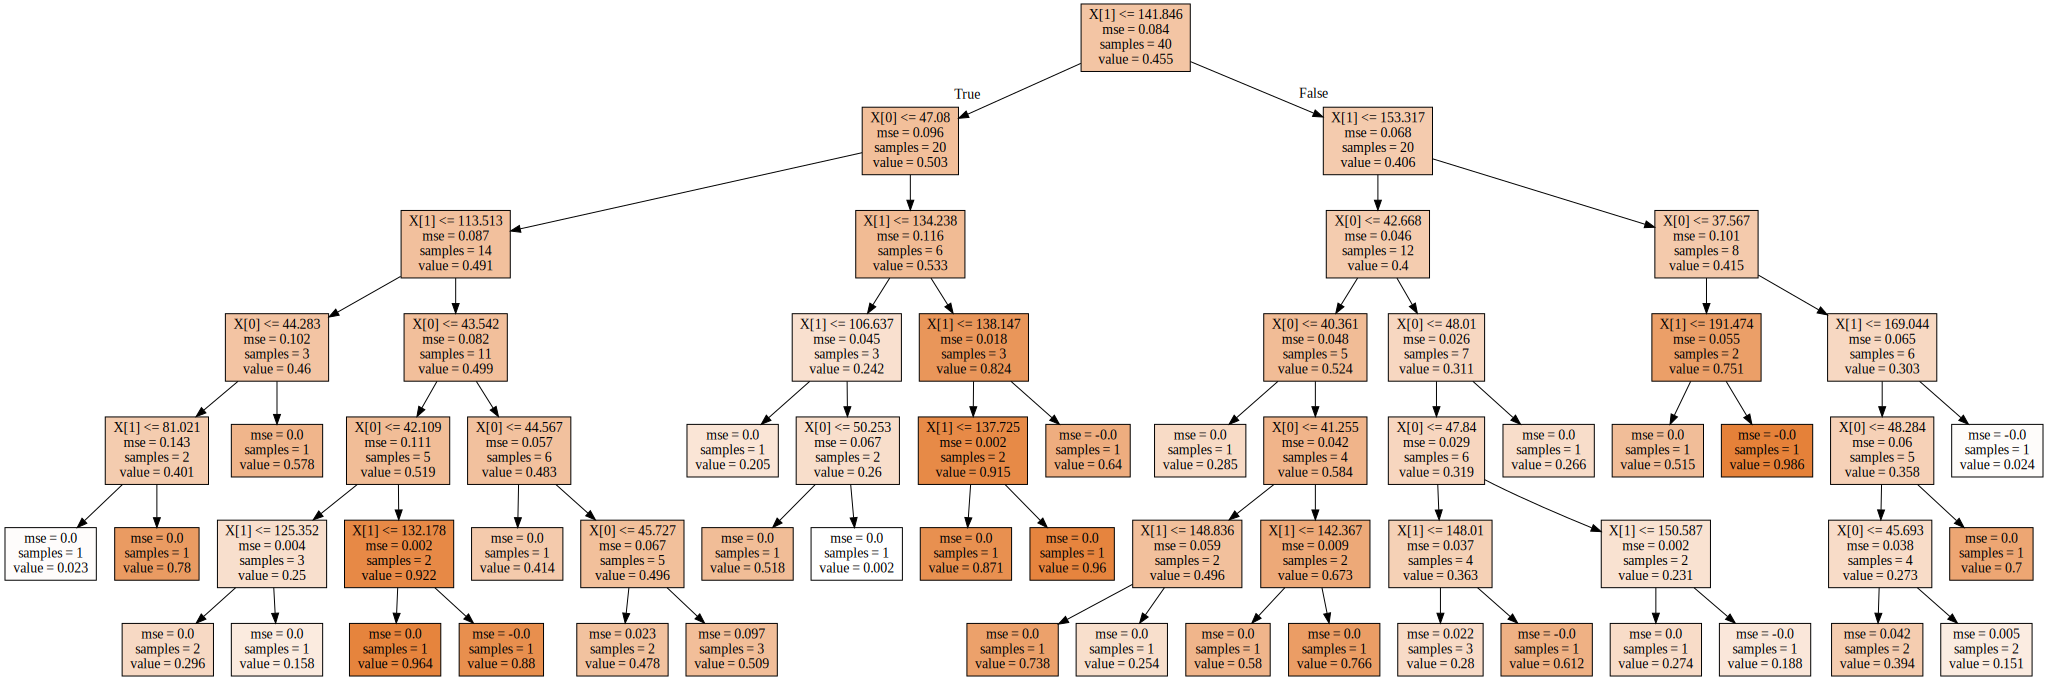

In [26]:
from sklearn import tree
import graphviz

graphdata = tree.export_graphviz(model[0],filled=True)
graph = graphviz.Source(graphdata)
graph

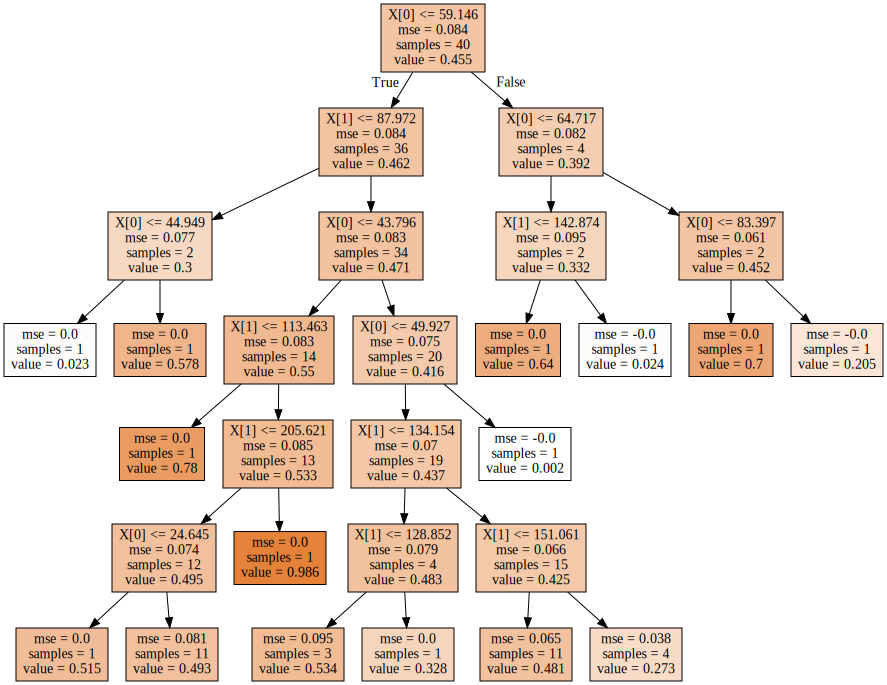

In [27]:
graphdata = tree.export_graphviz(model[1],filled=True)
graph = graphviz.Source(graphdata)
graph

In [29]:
newdata = [[45,125]]
model.predict(newdata)

array([1])

In [30]:
newdata = [[45,195]]
model.predict(newdata)

array([-1])

In [31]:
newdata = [[95,125]]
model.predict(newdata)

array([-1])